In [1]:
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
file=[]

clusters_list = os.listdir("./mini_newsgroups")


In [3]:

file_number = []
dataset = []
target=[]
for i in range(0,20):
    y = clusters_list[i]
    test = os.listdir('./mini_newsgroups/'+y)
    file_number.append(test)
    
    
for r in range(0,len(clusters_list)):
    for u in range(0,len(file_number)):
        with open('./mini_newsgroups/'+ clusters_list[r] + '/' + file_number[r][u], 'r' ) as t:
            b = t.read()
            
            dataset.append(b)
            target.append(clusters_list[r])
    
    
    
    

In [4]:
print(len(dataset))
print(len(target))

400
400


In [5]:
dataset = pd.DataFrame(dataset)
target = pd.DataFrame(target)

In [6]:
dataset[1] = target[0]
allNewsDf = dataset

In [7]:
allNewsDf.columns = ['text', 'class']
allNewsDf

,text,class
0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
1,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,alt.atheism
4,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
...,...,...
395,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
396,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
397,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
398,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc


In [8]:
# 將文章轉換為TF-IDF向量
allCount = CountVectorizer().fit_transform(dataset['text'].tolist())
allTfidf = TfidfTransformer().fit_transform(allCount)

In [9]:
# 將原始TF-IDF降至2維
decomposition = TruncatedSVD(n_components=2).fit_transform(allTfidf)
allNewsDf["decomposition"] = decomposition.tolist()
allNewsDf["decomposition-0"] = allNewsDf["decomposition"].apply(lambda x: x[0])
allNewsDf["decomposition-1"] = allNewsDf["decomposition"].apply(lambda x: x[1])

In [10]:
kmeansStart = time.time()
allNewsDf["kmeans"] = KMeans(n_clusters=20).fit(allTfidf).labels_
kmeansEnd = time.time() - kmeansStart

In [11]:
hierarchicalStart = time.time()
allNewsDf["hierarchical"] = AgglomerativeClustering(n_clusters=20).fit(allTfidf.todense()).labels_
hierarchicalEnd = time.time() - hierarchicalStart

In [12]:
DBSCANStart = time.time()
allNewsDf["DBSCAN"] = DBSCAN(eps=1, min_samples=0.1).fit(allTfidf).labels_
DBSCANEnd = time.time() - DBSCANStart

In [13]:
decompositionKmeansStart = time.time()
allNewsDf["decompositionKmeans"] = KMeans(n_clusters=20).fit(decomposition).labels_
decompositionKmeansEnd = time.time() - decompositionKmeansStart

In [14]:
decompositionHierarchicalStart = time.time()
allNewsDf["decompositionHierarchical"] = AgglomerativeClustering(n_clusters=20).fit(decomposition).labels_
decompositionHierarchicalEnd = time.time() - decompositionHierarchicalStart

In [15]:
decompositionDBSCANStart = time.time()
allNewsDf["decompositionDBSCAN"] = DBSCAN(eps=0.003, min_samples=0.1).fit(decomposition).labels_
decompositionDBSCANEnd = time.time() - decompositionDBSCANStart

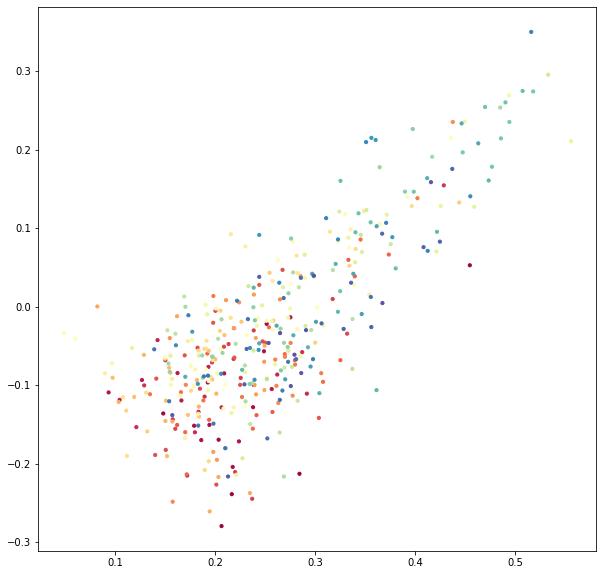

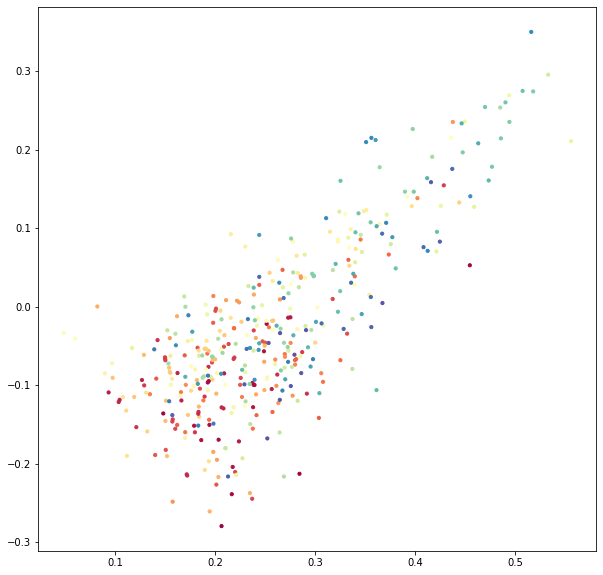

In [16]:
# %%time
plt.rcParams['figure.figsize'] = [10, 10]
pointSize = 10
pointEdgeSize = 1

# 原始資料分布
plt.scatter(allNewsDf["decomposition-0"], allNewsDf["decomposition-1"], c=allNewsDf["DBSCAN"], s=pointSize, linewidths=pointEdgeSize, cmap=plt.cm.Spectral)
plt.savefig("cluster-original.png", format="png")
plt.show()

# dbscan資料分布
plt.scatter(allNewsDf["decomposition-0"], allNewsDf["decomposition-1"], c=allNewsDf["decompositionDBSCAN"], s=10, linewidths=1, cmap=plt.cm.Spectral)
plt.savefig("cluster-dbscan.png", format="png")
plt.show()

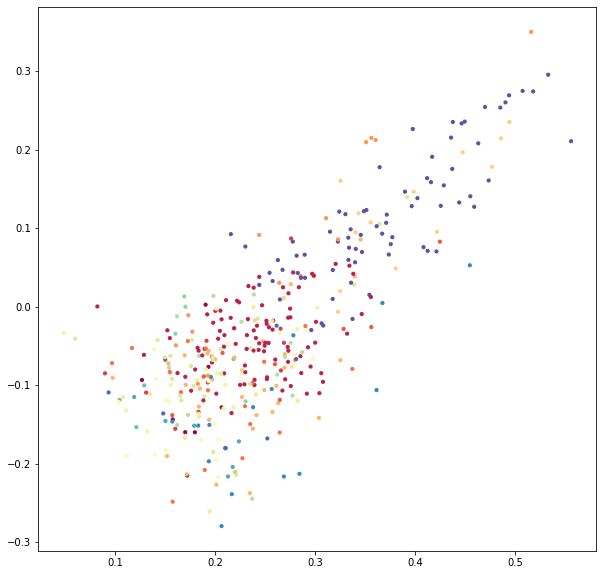

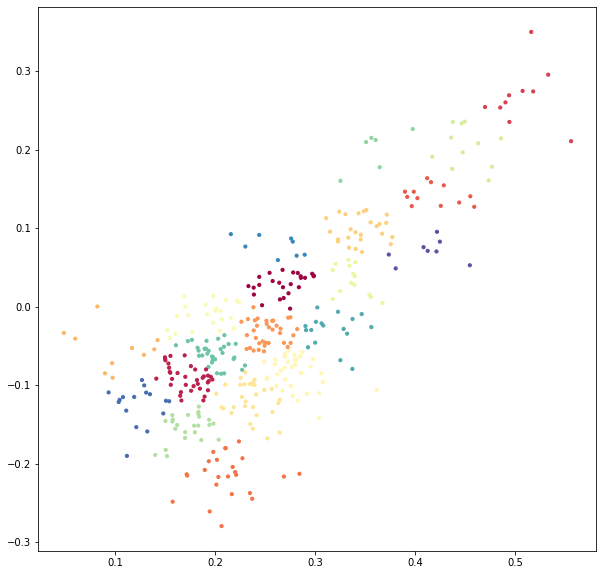

In [17]:
# kmeans原始資料分布
plt.scatter(allNewsDf["decomposition-0"], allNewsDf["decomposition-1"], c=allNewsDf["kmeans"], s=10, linewidths=1, cmap=plt.cm.Spectral)
plt.savefig("cluster-kmeans.png", format="png")
plt.show()

# kmeans資料分布降維後
plt.scatter(allNewsDf["decomposition-0"], allNewsDf["decomposition-1"], c=allNewsDf["decompositionKmeans"], s=10, linewidths=1, cmap=plt.cm.Spectral)
plt.savefig("cluster-kmeans.png", format="png")
plt.show()

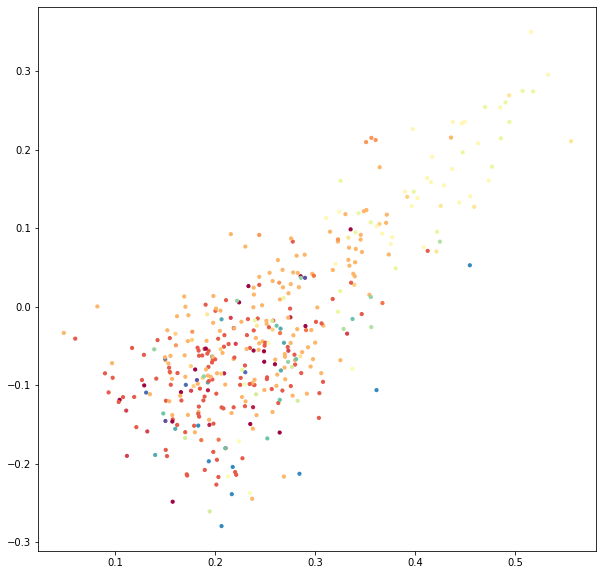

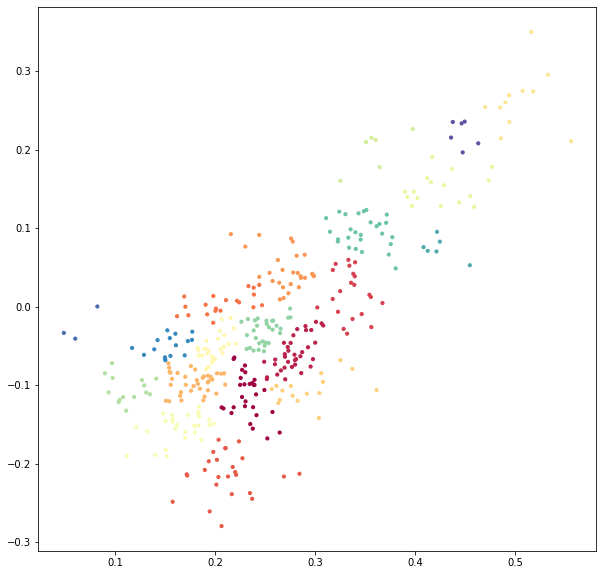

In [18]:

# hierarchical原始資料分布
plt.scatter(allNewsDf["decomposition-0"], allNewsDf["decomposition-1"], c=allNewsDf["hierarchical"], s=10, linewidths=1, cmap=plt.cm.Spectral)
plt.savefig("cluster-hierarchical.png", format="png")
plt.show()


# hierarchical降維後資料分布
plt.scatter(allNewsDf["decomposition-0"], allNewsDf["decomposition-1"], c=allNewsDf["decompositionHierarchical"], s=10, linewidths=1, cmap=plt.cm.Spectral)
plt.savefig("cluster-hierarchical.png", format="png")
plt.show()

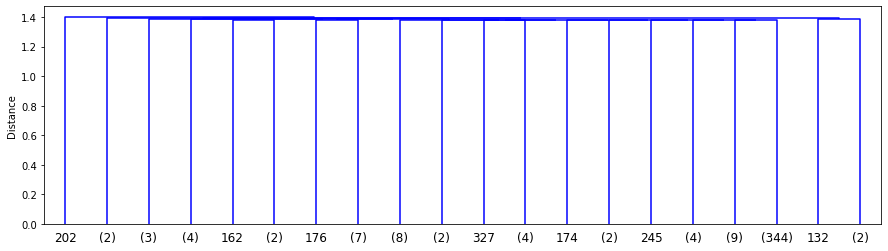

In [19]:
# 降維前的Dendrogram
plt.figure(figsize=(15, 4))
plt.ylabel("Distance")
dendrogram(hierarchy.linkage(allTfidf.todense(), "average"), truncate_mode="lastp", p=20)
plt.savefig("cluster-dendrogram(before decomposition).png", format="png")
plt.show()

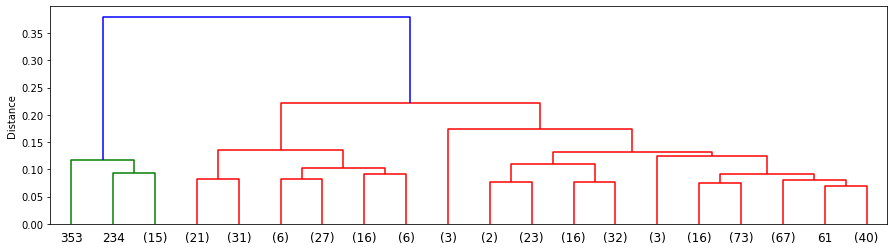

In [20]:
# 降維後的Dendrogram
plt.figure(figsize=(15, 4))
plt.ylabel("Distance")
dendrogram(hierarchy.linkage(decomposition, "average"), truncate_mode="lastp", p=20)
plt.savefig("cluster-dendrogram(agter decomposition).png", format="png")
plt.show()

In [21]:
purity = pd.DataFrame()

purity["kmeansMaxCount"] = allNewsDf.groupby(["class", "kmeans"], as_index=False).count().groupby("kmeans", as_index=False).max()["text"]
purity["kmeansClusterCount"] = allNewsDf.groupby("kmeans").count()["text"]
purity["kmeansPurity"] = purity["kmeansMaxCount"] / purity["kmeansClusterCount"]
purity["kmeansTotalPurity"] = sum(purity["kmeansPurity"] * purity["kmeansClusterCount"] / allNewsDf.shape[0])

purity["hierarchicalMaxCount"] = allNewsDf.groupby(["class", "hierarchical"], as_index=False).count().groupby("hierarchical", as_index=False).max()["text"]
purity["hierarchicalClusterCount"] = allNewsDf.groupby("hierarchical").count()["text"]
purity["hierarchicalPurity"] = purity["hierarchicalMaxCount"] / purity["hierarchicalClusterCount"]
purity["hierarchicalTotalPurity"] = sum(purity["hierarchicalPurity"] * purity["hierarchicalClusterCount"] / allNewsDf.shape[0])

dbscanPurity = pd.DataFrame()
dbscanPurity["DBSCANMaxCount"] = allNewsDf[allNewsDf["DBSCAN"] >= 0].groupby(["class", "DBSCAN"], as_index=False).count().groupby("DBSCAN", as_index=False).max()["text"]
dbscanPurity["DBSCANClusterCount"] = allNewsDf[allNewsDf["DBSCAN"] >= 0].groupby("DBSCAN").count()["text"]
dbscanPurity["DBSCANPurity"] = dbscanPurity["DBSCANMaxCount"] / dbscanPurity["DBSCANClusterCount"]
dbscanPurity["DBSCANTotalPurity"] = sum(dbscanPurity["DBSCANPurity"] * dbscanPurity["DBSCANClusterCount"] / allNewsDf.shape[0])
purity = purity.join(dbscanPurity)

purity["decompositionKmeansMaxCount"] = allNewsDf.groupby(["class", "decompositionKmeans"], as_index=False).count().groupby("decompositionKmeans", as_index=False).max()["text"]
purity["decompositionKmeansClusterCount"] = allNewsDf.groupby("decompositionKmeans").count()["text"]
purity["decompositionKmeansPurity"] = purity["decompositionKmeansMaxCount"] / purity["decompositionKmeansClusterCount"]
purity["decompositionKmeansTotalPurity"] = sum(purity["decompositionKmeansPurity"] * purity["decompositionKmeansClusterCount"] / allNewsDf.shape[0])

purity["decompositionHierarchicalMaxCount"] = allNewsDf.groupby(["class", "decompositionHierarchical"], as_index=False).count().groupby("decompositionHierarchical", as_index=False).max()["text"]
purity["decompositionHierarchicalClusterCount"] = allNewsDf.groupby("decompositionHierarchical").count()["text"]
purity["decompositionHierarchicalPurity"] = purity["decompositionHierarchicalMaxCount"] / purity["decompositionHierarchicalClusterCount"]
purity["decompositionHierarchicalTotalPurity"] = sum(purity["decompositionHierarchicalPurity"] * purity["decompositionHierarchicalClusterCount"] / allNewsDf.shape[0])

dbscanPurity = pd.DataFrame()
dbscanPurity["decompositionDBSCANMaxCount"] = allNewsDf[allNewsDf["decompositionDBSCAN"] >= 0].groupby(["class", "decompositionDBSCAN"], as_index=False).count().groupby("decompositionDBSCAN", as_index=False).max()["text"]
dbscanPurity["decompositionDBSCANClusterCount"] = allNewsDf[allNewsDf["decompositionDBSCAN"] >= 0].groupby("decompositionDBSCAN").count()["text"]
dbscanPurity["decompositionDBSCANPurity"] = dbscanPurity["decompositionDBSCANMaxCount"] / dbscanPurity["decompositionDBSCANClusterCount"]
dbscanPurity["decompositionDBSCANTotalPurity"] = sum(dbscanPurity["decompositionDBSCANPurity"] * dbscanPurity["decompositionDBSCANClusterCount"] / allNewsDf.shape[0])
purity = purity.join(dbscanPurity)

purity

,kmeansMaxCount,kmeansClusterCount,kmeansPurity,kmeansTotalPurity,hierarchicalMaxCount,hierarchicalClusterCount,hierarchicalPurity,hierarchicalTotalPurity,DBSCANMaxCount,DBSCANClusterCount,...,decompositionKmeansPurity,decompositionKmeansTotalPurity,decompositionHierarchicalMaxCount,decompositionHierarchicalClusterCount,decompositionHierarchicalPurity,decompositionHierarchicalTotalPurity,decompositionDBSCANMaxCount,decompositionDBSCANClusterCount,decompositionDBSCANPurity,decompositionDBSCANTotalPurity
0,6,8,0.750000,0.345,3,19,0.157895,0.31,1,1,...,0.120000,0.19,5,29,0.172414,0.1975,1,1,1.000000,0.93
1,12,95,0.126316,0.345,4,5,0.800000,0.31,3,3,...,0.111111,0.19,5,36,0.138889,0.1975,1,1,1.000000,0.93
2,5,11,0.454545,0.345,5,9,0.555556,0.31,1,1,...,0.500000,0.19,3,21,0.142857,0.1975,1,1,1.000000,0.93
3,5,8,0.625000,0.345,15,105,0.142857,0.31,1,1,...,0.166667,0.19,6,25,0.240000,0.1975,1,1,1.000000,0.93
4,4,18,0.222222,0.345,4,7,0.571429,0.31,1,1,...,0.208333,0.19,4,20,0.200000,0.1975,1,1,1.000000,0.93
5,12,13,0.923077,0.345,8,8,1.000000,0.31,1,1,...,0.114286,0.19,5,27,0.185185,0.1975,1,1,1.000000,0.93
6,13,34,0.382353,0.345,12,128,0.093750,0.31,2,2,...,0.200000,0.19,6,36,0.166667,0.1975,1,1,1.000000,0.93
7,16,17,0.941176,0.345,7,11,0.636364,0.31,1,1,...,0.200000,0.19,5,16,0.312500,0.1975,1,2,0.500000,0.93
8,3,11,0.272727,0.345,9,9,1.000000,0.31,1,1,...,0.133333,0.19,6,11,0.545455,0.1975,1,1,1.000000,0.93
9,3,11,0.272727,0.345,6,27,0.222222,0.31,1,1,...,0.235294,0.19,5,28,0.178571,0.1975,1,1,1.000000,0.93


In [22]:
print(purity[["kmeansPurity", "hierarchicalPurity", "DBSCANPurity", "decompositionKmeansPurity", "decompositionHierarchicalPurity", "decompositionDBSCANPurity"]])
purity[["kmeansPurity", "hierarchicalPurity", "DBSCANPurity", "decompositionKmeansPurity", "decompositionHierarchicalPurity", "decompositionDBSCANPurity"]]

    kmeansPurity  hierarchicalPurity  DBSCANPurity  decompositionKmeansPurity  \
0       0.750000            0.157895           1.0                   0.120000   
1       0.126316            0.800000           1.0                   0.111111   
2       0.454545            0.555556           1.0                   0.500000   
3       0.625000            0.142857           1.0                   0.166667   
4       0.222222            0.571429           1.0                   0.208333   
5       0.923077            1.000000           1.0                   0.114286   
6       0.382353            0.093750           1.0                   0.200000   
7       0.941176            0.636364           1.0                   0.200000   
8       0.272727            1.000000           1.0                   0.133333   
9       0.272727            0.222222           1.0                   0.235294   
10      0.454545            0.500000           1.0                   0.217391   
11      0.714286            

,kmeansPurity,hierarchicalPurity,DBSCANPurity,decompositionKmeansPurity,decompositionHierarchicalPurity,decompositionDBSCANPurity
0,0.750000,0.157895,1.0,0.120000,0.172414,1.000000
1,0.126316,0.800000,1.0,0.111111,0.138889,1.000000
2,0.454545,0.555556,1.0,0.500000,0.142857,1.000000
3,0.625000,0.142857,1.0,0.166667,0.240000,1.000000
4,0.222222,0.571429,1.0,0.208333,0.200000,1.000000
5,0.923077,1.000000,1.0,0.114286,0.185185,1.000000
6,0.382353,0.093750,1.0,0.200000,0.166667,1.000000
7,0.941176,0.636364,1.0,0.200000,0.312500,0.500000
8,0.272727,1.000000,1.0,0.133333,0.545455,1.000000
9,0.272727,0.222222,1.0,0.235294,0.178571,1.000000


In [23]:
purity[["kmeansTotalPurity", "hierarchicalTotalPurity", "DBSCANTotalPurity", "decompositionKmeansTotalPurity", "decompositionHierarchicalTotalPurity", "decompositionDBSCANTotalPurity"]]

,kmeansTotalPurity,hierarchicalTotalPurity,DBSCANTotalPurity,decompositionKmeansTotalPurity,decompositionHierarchicalTotalPurity,decompositionDBSCANTotalPurity
0,0.345,0.31,0.995,0.19,0.1975,0.93
1,0.345,0.31,0.995,0.19,0.1975,0.93
2,0.345,0.31,0.995,0.19,0.1975,0.93
3,0.345,0.31,0.995,0.19,0.1975,0.93
4,0.345,0.31,0.995,0.19,0.1975,0.93
5,0.345,0.31,0.995,0.19,0.1975,0.93
6,0.345,0.31,0.995,0.19,0.1975,0.93
7,0.345,0.31,0.995,0.19,0.1975,0.93
8,0.345,0.31,0.995,0.19,0.1975,0.93
9,0.345,0.31,0.995,0.19,0.1975,0.93


In [24]:
# kmeans silhouette
kmeanSilhoette = metrics.silhouette_score(allTfidf, allNewsDf["kmeans"])
# hierarchical silhouette
hierarchicalSilhoette = metrics.silhouette_score(allTfidf, allNewsDf["hierarchical"])
# DBSCAN silhouette
dbscanSilhouette = metrics.silhouette_score(allTfidf, allNewsDf["DBSCAN"])

# decomposition kmeans silhouette
decompositionKmeanSilhoette = metrics.silhouette_score(allTfidf, allNewsDf["decompositionKmeans"])
# decomposition hierarchical silhouette
decompositionHierarchicalSilhoette = metrics.silhouette_score(allTfidf, allNewsDf["decompositionHierarchical"])
# decomposition DBSCAN silhouette
decompositionDbscanSilhouette = metrics.silhouette_score(allTfidf, allNewsDf["decompositionDBSCAN"])

In [25]:
# 降維前的分群績效比較
method = ["K means", "Hierarchical", "DBSCAN"]
silhoetteScore = [kmeanSilhoette, hierarchicalSilhoette, dbscanSilhouette]
runTime = [kmeansEnd, hierarchicalEnd, DBSCANEnd]
silhoetteScoreDf = pd.DataFrame({"Algorithm": method, "Purity": [purity["kmeansTotalPurity"][0], purity["hierarchicalTotalPurity"][0], purity["DBSCANTotalPurity"][0]], "Silhoette score": silhoetteScore, "run time(s)": runTime})
print(silhoetteScoreDf)
silhoetteScoreDf

      Algorithm  Purity  Silhoette score  run time(s)
0       K means   0.345         0.010348     0.755499
1  Hierarchical   0.310         0.015352     1.614225
2        DBSCAN   0.995         0.018275     0.022970


,Algorithm,Purity,Silhoette score,run time(s)
0,K means,0.345,0.010348,0.755499
1,Hierarchical,0.310,0.015352,1.614225
2,DBSCAN,0.995,0.018275,0.022970


      Algorithm  Purity  Silhoette score  run time(s)
0       K means   0.315         0.010457     0.743012
1  Hierarchical   0.310         0.015352     2.148057
2        DBSCAN   0.995         0.018275     0.023967

In [26]:
# 降維後的分群績效比較
method = ["K means", "Hierarchical", "DBSCAN"]
silhoetteScore = [decompositionKmeanSilhoette, decompositionHierarchicalSilhoette, decompositionDbscanSilhouette]
runTime = [decompositionKmeansEnd, decompositionHierarchicalEnd, decompositionDBSCANEnd]
silhoetteScoreDf = pd.DataFrame({"Algorithm": method, "Purity": [purity["decompositionKmeansTotalPurity"][0], purity["decompositionHierarchicalTotalPurity"][0], purity["decompositionDBSCANTotalPurity"][0]], "Silhoette score": silhoetteScore, "run time(s)": runTime})
print(silhoetteScoreDf)
silhoetteScoreDf

      Algorithm  Purity  Silhoette score  run time(s)
0       K means  0.1900        -0.021009     0.081764
1  Hierarchical  0.1975        -0.021083     0.003990
2        DBSCAN  0.9300        -0.017348     0.001994


,Algorithm,Purity,Silhoette score,run time(s)
0,K means,0.1900,-0.021009,0.081764
1,Hierarchical,0.1975,-0.021083,0.003990
2,DBSCAN,0.9300,-0.017348,0.001994


      Algorithm  Purity  Silhoette score  run time(s)
0       K means  0.1950        -0.023223     0.111557
1  Hierarchical  0.2000        -0.021160     0.003989
2        DBSCAN  0.9375        -0.016388     0.015959